---
title: "SLAB Legal Aid Model Documentation"
date: May/20/2024
authors:
  - name: Graham Stark
    affiliation: Virtual Worlds Research
    email: graham.stark@virtual-worlds.scot
bibliography: references.bib
# engine: /opt/julia/bin/julia
jupyter: julia-1.10
---

In [1]:
using DataFrames, CairoMakie, CSV, StatsBase, GLM, Revise



## Introduction

These are technical notes for the for the Scottish Legal Aid Board eligibility simulator model.

For an overview of the purpose and desired specifications of the model, please refer to the SLAB bid document and the Virtual Worlds tender document. For an overview of the legal aid system itself, see [???] Broadly, purpose of the model is to estimate the entitlement to both Civil and Advice and Assistance (AA) legal aid amongst the Scottish Population under the current and various hypothetical systems, and from that estimate the likely costs or savings of changes to eligibility rules. 

The LASim model that was built do do this built on earlier work for the England And Wales Legal Aid Board [] and the Scottish Legal Aid Board [] []. 

## The Model

### Code organisation

LASim builds on Scotben [][], a microsimulation tax-benefit model of Scotland. Scotben is a conventional static microsimulation model, built using the Julia programming language and using Family Resources Survey (FRS) [] data. 

All the code used in this project is available for inspection on the GitHub [] code sharing site.

Julia code is organised into `modules` [] which are aggregated into packages [] which can be downloaded and either run directly or integrated into other programs. ScotBen is a Julia package. For this project, several modules were added to the Scotben package:

* LegalAidCalculations.jl []
* LegalAidOutput.jl [] 
* LegalAidData.jl []

in addition, additions were made to:

* STBParameters.jl -
* Results.jl - 
* SingleHouseholdCalculations.jl -  
* STBOutput - 

In addition, several weeks development time was spent on the module `LegalAidRunner.jl` which was intended to be a specialised high-speed driver module for legal aid calculations. This module was eventually abandoned because its memory requirements were too mich for the relatively underpowered laptop chosen to host the model.

The model has a web interface. This is implemented as a seperate package []. This is discussed below. 

::: {.callout-note}

The front-end package needs rationalised. The package includes not only the actual front-end but two earlier abortive attempts at interfaces for the model. Only the `LASim` subfolder is actually needed.

:::

### Modelling 

::: {.callout-note}
There are two issues with benefits:

* we use modelled entitlements rather than recorded reciepts 
* the transition from Legacy Benefits [] to Universal Credit is progressing and this is hard to capture accurately. 
:::

Specification of the legal aid system came from the following documents:

*
*
*

### Testing 

Core code is created test-first []. Material for the tests came mainly from the online Legal Aid Calculators [][]. The spreadsheet 
[][] contains the raw test cases, which were translated into the testsuite ``[]. The testsuite also contains a number of "dry runs" of the model.

::: {.callout-note}
The test suite is not as comprehensive as it should be. Quite a serious mistake in how capital is treated for passporting in AA slipped through unchecked until late in the development process. Mistakes in which benefits are disregarded also slipped though until late on. 
:::
### Web Interface

The model has a web user interface. The code for this is in the LASim package. This is effectively the main package for the system, though legal aid simulations can actually be run directly from the `Scotben` package, or from any code that imports `ScotBen`. 

The package uses the [Genie]() web framework. It is a single-page application which uses a large amount of hand-written Javascript to handle submissions and responses. Styling uses the [Bootstrap]() css framework, customised to use SLAB fonts and colours. 


::: {.callout-note}
There are several issues with the front-end:

* the front-end is probably too big for a single page. It should either be broken up or aspects of inputs and outputs should be hidden by default
* the interface code is hand-written and close to the limit of what can be maintained by hand-coding. A more automated system would be needed if many more options were added;
* there are problems with the interface's performance on the rather limited SLAB laptop supplied for running it;
* the monitoring `progress bar` code was added last-minute and is unreliable;

:::


### FRS Data

The model uses the Scottish households from pooled 2015-2021 Family Resources (FRS) data. We use the public use FRS release which has a number of fields deleted for privacy reasons, though the deletions often seem arbitrary.

The FRS is augmented with matched in data from the Scottish Household Survey and the Living Costs and Food Survey. SHS is mainly used to give local-level information and is not very relevant to Legal Aid. LCF is used to provide estimates for some of the expense fields - repayments, travel to work costs and work expenses.


#### Matching 

#### Capital

#### Expenses

* Housing - for owner occupiers the FRS normally just counts mortgage interest as a cost. We add in capital repayments though this is tricky to derive from FRS variables. Code is in `xx` function in the `xxx` library. 
* Maintenance payments  - ??
* Debt repayments - use matched LCF data - COICOP code [XXX].

::: {.callout-note}

Expense fields seem low. It is known that average expenses for maintenance contributions, debt repayments and work expenses are much lower on average in the FRS than in SLAB administrative data. This may simply be a selection problem but needs more investigation. Debt in particular could be reworked. Note that student loans are mostly paid through income tax and thus automatically deducted from the model's income tax calculation.
:::

### Scottish Crime and Justice Survey (SCJS)

As an aside, the original proposal was to use SCJS to model the likelihood of households experiencing a problem requiring legal advice. Some initial work was carried out which produced promising but this was abandoned on SLAB's instructions. It could well be worth returning to this, perhaps as a stand-alone piece of work.  

### SLAB Datasets

Anonymised versions of the complete SLAB Civil and AA payments data for 2022/3 were supplied. These are the files XX and XX. 
These were used in the production of cost and caseload estimates. The procedure is crude, but the same as used in the 2007 study. The module `LegalAidData.jl` crosstabs the payment data by age group, sex/gender, case type, and entitlement level (passported/full entitlement/with contribition) and these are matched against crosstabs from the model by age/sex/estimated entitlement level to give estimates of the propensity of each entitlement group to claim legal aid. This is a crude procedure which at times produces questionable results such as the propensities for contributory benefit units sometimes being higher than for passported/fully entitled benefit units.    

### Updating and Maintenance

### TODODs

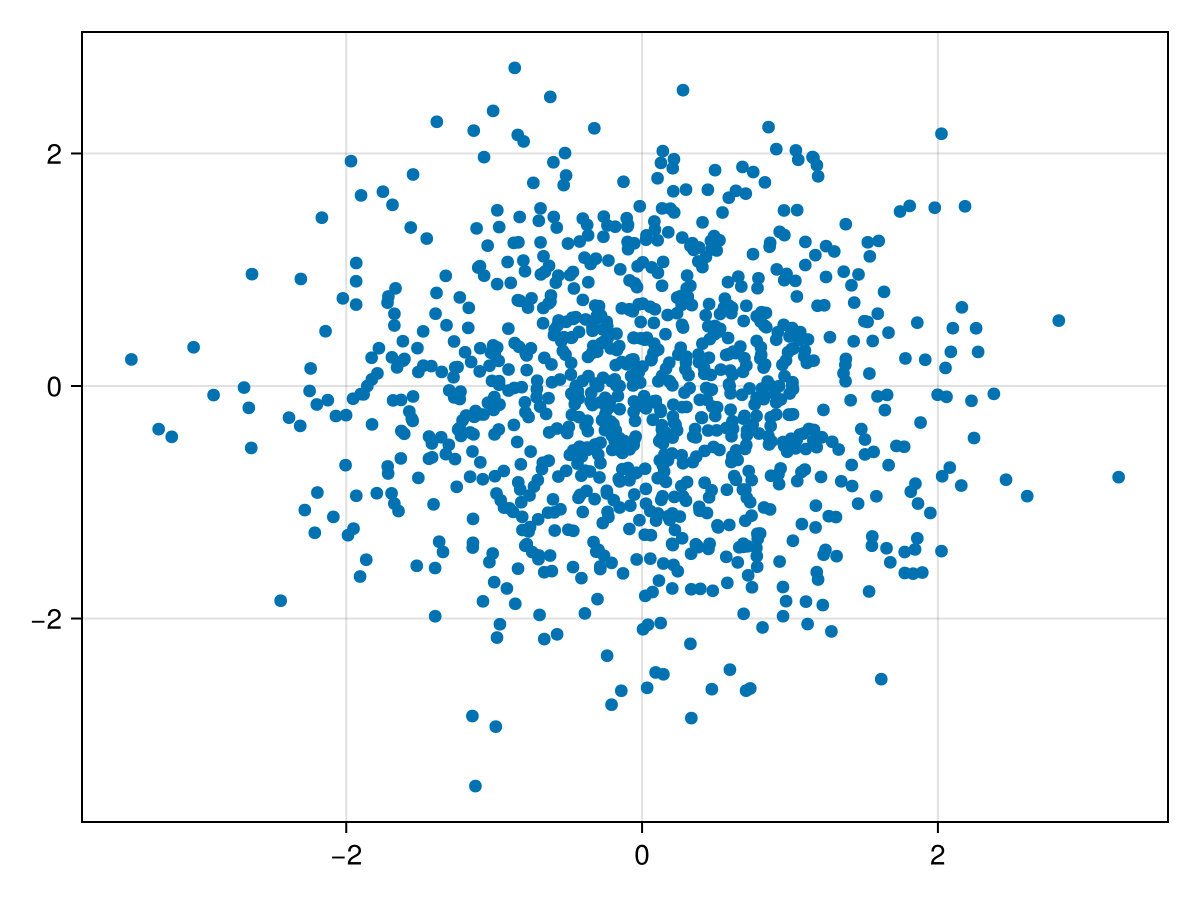

In [1]:

#| echo: false
#| 

x = 10202020

b = scatter(randn(1000),randn(1000); )

b


```julia

d = DataFrame(a=rand(10))
d

```

## Calibration

## User Interface
